In [1]:
import netCDF4
import time
from netCDF4 import Dataset
#from coards import from_udunits
import numpy as np
import pickle
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from mpl_toolkits.basemap import Basemap
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def coherence(modelo1,modelo2):
         import pylab 
         from pylab import detrend_linear,detrend_mean
 
         n, X, Y, sxy, coer, sxx, syy = len(modelo1),np.fft.fft(modelo1), np.fft.fft(modelo2), [], [], [],[]
         # densidade espectral de potencia
         variance1 = np.var(modelo1)
         variance2 = np.var(modelo2)
         sxx = (X * np.conj(X))/n

         syy = (Y * np.conj(Y))/n
         sxy = (X * np.conj(Y))/n

         # calulo da coerencia
         coer = (sxy ** 2) / (sxx * syy)
         #coer = np.abs(coer.real) # for squared-coherency
         coer = (coer[int(np.ceil( n/2.)):]) #ON 0.72, OFF 1.0
         # defasagem
         nc = len (sxy)
         fi = ma.zeros((nc),float)
         fi = np.arctan2(-sxy.imag, sxy.real)
         fi = fi[int(np.ceil( n/2.)):]
         #fi = fi *180/np.pi #+180
         f = -np.fft.fftfreq(n)[int(np.ceil( n/2.)):]
         
         
         sxx  =np.abs (sxx.real)
         sxx  = sxx[int(np.ceil( n/2.)):]
         
         syy  =np.abs (syy.real)
         syy  = syy[int(np.ceil( n/2.)):]
        
         #stdO = np.sqrt(1.0/n * (pow((syy -np.mean(syy)),2)))
         #stdM= np.sqrt(1.0/n * (pow((sxx-np.mean(sxx)),2)))
         amp = 2* 1/n*np.abs(X)
         amp = amp[int(np.ceil( n/2.)):]
         
         
         coerdata = {'coer':coer.real, 'fi':fi, 'f':f, 'sxx':sxx, 'syy':syy, 'amp':amp.real}
         return coerdata
        

In [3]:
def TaylorSpectral_all(series,s_name,fig_name,text_name):
    """ Taylor Diagram : obs is reference data sample
        in a full diagram (0 --> npi)
        --------------------------------------------------------------------------
        Input: f - freq of reference  -- > lead to a phase reference
               series - dictionary with time series to test.
                        series[0] = reference time series by default
               s_name - list of the names of the time series
               fig_name   - if name!= 'default' save the figure in /Users/usuario/CSIRO/figs/
    """
    import numpy as np
    from numpy import ma
    import mpl_toolkits.axisartist.grid_finder as GF
    import mpl_toolkits.axisartist.floating_axes as FA
    import matplotlib.pyplot as plt
    import statistics
    
    #f_ref = np.abs(f - series[0]['period'][:]).argmin() 
    coerdata =0
    coer =0
    std=0
    coer_l,coer_s,coer_d = 0,0,0
    std_l,std_s,std_d,std0 =0,0,0,0
    
    coerdata,coer,std,std_max ={},{},{},{}
    coer_l,coer_s,coer_d = {},{},{}
    std_l,std_s,std_d,std0 ={},{},{},{}
   
    coerdata2 ={}
    
    for i in series.keys():
        series[i]   = hstack(series[i])                    # stack array in sequence horizontally- fft in axis =0
        coerdata[i] = coherence(series[i],series[0])
        coerdata2[i] = coherence(series[i],series[5])
        n           = len(coerdata[i]['sxx'])
    
        
        #f_ref       = np.abs(coerdata[0]['f'][:] - fmin).argmin()
        #f_rmax      = np.abs(coerdata[0]['f'][:] - fmax).argmin()
        
        fl_ref       = np.abs(coerdata[0]['f'][:] - 0.0).argmin()
        fl_rmax      = np.abs(coerdata[0]['f'][:] - 0.004).argmin()
        fd_ref       = np.abs(coerdata[0]['f'][:] - 0.036).argmin()
        fd_rmax      = np.abs(coerdata[0]['f'][:] - 0.042).argmin()
        fs_ref       = np.abs(coerdata[0]['f'][:] - 0.077).argmin()
        fs_rmax      = np.abs(coerdata[0]['f'][:] - 0.084).argmin()
        
        
        std[i]      = np.sqrt(1.0/n * pow((coerdata[i]['sxx'] -np.mean(coerdata[i]['sxx'])),2))
     
        #std[i]      = std[i][f_ref]
        
        
        #std_max[i]  = np.sqrt(1.0/(len(coerdata[i]['sxx'])) *  (pow((coerdata[i]['sxx'][f_rmax] -np.mean(coerdata[i]['sxx'])),2)))
        coer[i]     = coerdata[i]['coer'][fd_ref]
        
        
        
        
        
        #if coer[i]<0 :
        #    coer[i] = -coer[i]
        
        #print s_name[i], coer[i], std[i]/std[0]
        
        
    ref = 1 #np.abs(coerdata[0]['sxx'][f_ref].real-np.mean(coerdata[0]['sxx'].real)) # std[0]#1
    #mean values to be R0
    numbers = [coer[key] for key in coer]
    MED = statistics.mean(numbers)
    MAX = np.max(numbers)
    print (MAX)
    
    rlocs = around(np.concatenate((np.arange(0,-10,-0.2),[-0.95,-0.99],np.arange(0,10,0.2),[0.95,0.99])),2)
    str_rlocs = np.concatenate((np.arange(0,10,0.2),[0.95,0.99],np.arange(0,10,0.2),[0.95,0.99]))
    tlocs = np.arccos(rlocs)        # Conversion to polar angles
    gl1 = GF.FixedLocator(tlocs)    # Positions
    tf1 = GF.DictFormatter(dict(zip(tlocs, map(str,rlocs))))
    

    str_locs2 = np.arange(-10,11,0.5)
    tlocs2 =  np.arange(-10,11,0.5)      # Conversion to polar angles
       
    g22 = GF.FixedLocator(tlocs2)  
    tf2 = GF.DictFormatter(dict(zip(tlocs2, map(str,str_locs2))))

    
    
    
    tr = PolarAxes.PolarTransform()
    
    smin = 0
    smax = 2.1

    ghelper = FA.GridHelperCurveLinear(tr,
                                           extremes=(0,np.pi/2, # 1st quadrant
                                                     smin,smax),
                                           grid_locator1=gl1,
                                           #grid_locator2=g11,
                                           
                                           tick_formatter1=tf1,
                                           tick_formatter2=tf2,
                                           )
    
    
    fig = plt.figure(figsize=(10,5.5), dpi=300)
    #fig.text(.5, .95, '%s'%text_name, horizontalalignment='center',fontsize=25)

    ax = FA.FloatingSubplot(fig,121, grid_helper=ghelper)
    ax.set_title('%s'%text_name, horizontalalignment='center',fontsize=12)

    fig.add_subplot(ax)
    ax.axis["top"].set_axis_direction("bottom") 
    ax.axis["top"].toggle(ticklabels=True, label=True)
    ax.axis["top"].major_ticklabels.set_axis_direction("top")
    ax.axis["top"].label.set_axis_direction("top")
    ax.axis["top"].label.set_text("Coherence function")
    ax.axis["top"].label.set_fontsize(8)
    
    ax.axis["left"].set_axis_direction("bottom") 
    ax.axis["left"].label.set_text("Standard Deviation of power")
    ax.axis["left"].label.set_fontsize(8)
    
    ax.axis["right"].set_axis_direction("top") 
    ax.axis["right"].toggle(ticklabels=True, label=True)
    ax.axis["right"].set_visible(True)
    ax.axis["right"].major_ticklabels.set_axis_direction("bottom")
   

    ax.axis["bottom"].set_visible(False) 

    ax.grid(True)

    ax = ax.get_aux_axes(tr)

    t = np.linspace(0, np.pi/2)
    r = np.zeros_like(t) + ref
    ax.plot(t,r, 'k--', label='_')


    rs,ts = np.meshgrid(np.linspace(smin,smax),
                            np.linspace(0,np.pi/2))

    
    #rms = np.sqrt(ref**2 + rs**2 - 2*ref*rs*np.cos(ts))
    #rms = 1 *e**(-(ref-ts)*np.pi/180)
    rms = (4*(1+np.cos(ts))/((rs+1/rs)**2 *(1+MAX)))#/std[0]
    CS =ax.contour(ts, rs,rms,[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],cmap = cm.bone)
    plt.clabel(CS, inline=1, fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)

    ax.plot(np.arccos(0.999999),ref,'k',marker='*',ls='', ms=12)
    aux = range(1,len(series.keys()))
    #del aux[ref]
    if fmax == 0 :
        #std[i]=std[i]/std[0]
        coer[i]     = coerdata[i]['coer'][f_ref]
        for i in aux:
                ax.plot(np.arccos(coer[i]),std[i]/std[0],marker='s',ms=10,alpha=0.4,label='%s'%s_name[i])
                
                
        legend(bbox_to_anchor=(1.1, 1),prop=dict(size='large'),loc='best')
    
        if (fig_name!= 'default'):
            print ('saving figure in figs')
            plt.savefig('/Users/usuario/CSIRO/figs/STD_%s.png'%name)
        
    else:
        
        for i in series.keys():
            
            if i ==2 or i ==4:
                coer_d[i] = np.mean(abs(coerdata2[i]['coer'][fd_rmax:fd_ref]))
                std_d[i] = np.sqrt(1.0/n * sum(pow((coerdata2[i]['sxx'][fd_rmax:fd_ref] -np.mean(coerdata2[i]['sxx'])),2)))
                coer_s[i] = np.mean(abs(coerdata2[i]['coer'][fs_rmax:fs_ref]))
                std_s[i] = np.sqrt(1.0/n * sum(pow((coerdata2[i]['sxx'][fs_rmax:fs_ref] -np.mean(coerdata2[i]['sxx'])),2)))
            else:
                coer_d[i] = np.mean(abs(coerdata[i]['coer'][fd_rmax:fd_ref]))
                std_d[i] = np.sqrt(1.0/n * sum(pow((coerdata[i]['sxx'][fd_rmax:fd_ref] -np.mean(coerdata[i]['sxx'])),2)))
            
                coer_s[i] = np.mean(abs(coerdata[i]['coer'][fs_rmax:fs_ref]))
                std_s[i] = np.sqrt(1.0/n * sum(pow((coerdata[i]['sxx'][fs_rmax:fs_ref] -np.mean(coerdata[i]['sxx'])),2)))
            
            
       
        #cl = ['gray','lightskyblue','cyan','blue','blue']
        cd = ['gray','green','gray', 'lime','black','black']
        cs = ['gray','gold','gray','yellow','black','black']
        m = ['s','s','s','*','*','s','*','*']
        ms =[15,20,20,20,20,20,15]      
        
        alf = [0.01,1,1,1,1,1,1]
        
        #print '--long term --' 
        #for i in aux:
        #    ax.plot(np.arccos(coer_l[i]),std_l[i]/std_l[0],marker=m[i],color =cl[i],ms=10,alpha=alf[i],label='long %s'%s_name[i])
        #    rmse_l = np.sqrt(1**2 + (std_l[i]/std_l[0])**2 - 2*1*(std_l[i]/std_l[0])*coer_l[i])
        #    print '%s '%s_name[i]
        #    print ' coer: %.2f rmse: %.2f '%(coer_l[i],rmse_l)
        #    print ' std/std0 :%.2f'%(std_l[i]/std_l[0])
        std_d1 ={}
        print ('--diurnal --')
        for i in [1,2,3,4]:
            print ('%s '%s_name[i])
            if i == 1   :
                std_d1[i]=std_d[i]/std_d[0]
                ax.plot(np.arccos(coer_d[i]),std_d1[i],marker=m[i],color =cd[i],ms=ms[i],alpha=alf[i],label='diur %s'%s_name[i], markerfacecolor="darkseagreen",markeredgecolor=cd[i], markeredgewidth=2, zorder =1)
                #rmse_d = np.sqrt(1**2 + (std_d [i]/std_d [0])**2 - 2*1*(std_d [i]/std_d [0])*coer_d [i])
                skill = (4*(1+(coer_d[i]))/((std_d1[i]+1/std_d1[i])**2 *(1+MAX)))
                print (' coer: %.2f  STD: %.2f  SKILL: %.2f   '%(coer_d[i],std_d1[i],skill)) 
            elif i ==2  or i ==4:
                std_d1[i]=std_d[i]/std_d[5]
                ax.plot(np.arccos(coer_d[i]),std_d1[i],marker=m[i],color =cd[i],ms=ms[i],alpha=alf[i],label='diur %s'%s_name[i], markerfacecolor="None",markeredgecolor=cd[i], markeredgewidth=1,zorder =2)
                #rmse_d = np.sqrt(1**2 + (std_d [i]/std_d [5])**2 - 2*1*(std_d [i]/std_d [5])*coer_d [i])
                skill = (4*(1+(coer_d[i]))/((std_d1[i]+1/std_d1[i])**2 *(1+MAX)))
                print (' coer: %.2f   STD: %.2f  SKILL: %.2f  '%(coer_d[i],std_d1[i],skill)) 
            elif i ==3: 
                std_d1[i]=std_d[i]/std_d[0]
                ax.plot(np.arccos(coer_d[i]),std_d1[i],marker=m[i],color =cd[i],ms=ms[i],alpha=alf[i],label='diur %s'%s_name[i],markeredgecolor='black', markeredgewidth=1)
                #rmse_d = np.sqrt(1**2 + (std_d [i]/std_d [0])**2 - 2*1*(std_d [i]/std_d [0])*coer_d [i])
                skill = (4*(1+(coer_d[i]))/((std_d1[i]+1/std_d1[i])**2 *(1+MAX)))
                print (' coer: %.2f   STD: %.2f   SKILL: %.2f '%(coer_d[i],std_d1[i],skill)) 
                
            x = [np.arccos(coer_d[1]),np.arccos(coer_d[2])]
            y = [std_d[1]/std_d[0],std_d[2]/std_d[5]]
            ax.plot(x,y,'grey', linewidth = 0.3)
            x1 = [np.arccos(coer_d[3]),np.arccos(coer_d[4])]
            y1 = [std_d[3]/std_d[0],std_d[4]/std_d[5]]
            ax.plot(x1,y1,'grey', linewidth = 0.3)
            
            
            #ax.plot(np.arccos(coer_d[i]),std_d[i]/std_d[0],marker=m[i], linestyle=linestyle, color=color, linewidth=3)
            
            
        #print ((std_d[1]/std_d[0]),(std_d[2]/std_d[5]),(std_d[3]/std_d[0]),(std_d[4]/std_d[5]))
        std_s1 ={}
        print ('--semi --')    
        for i in [1,2,3,4]:
            print ('%s '%s_name[i])
            if i == 1 :
                std_s1[i]=std_s[i]/std_s[0]
                ax.plot(np.arccos(coer_s[i]),std_s1[i],marker=m[i],color =cs[i],ms=ms[i],alpha=alf[i],label='semi %s'%s_name[i], markerfacecolor="khaki",markeredgecolor=cs[i], markeredgewidth=2, zorder=1)
                #rmse_s = np.sqrt(1**2 + (std_s[i]/std_s[0])**2 - 2*1*(std_s[i]/std_s[0])*coer_s[i])
                skill = 4*(1+((coer_s[i])))/((std_s1[i]+1/std_s1[i])**2 *(1+MAX))
                print (' coer: %.2f  STD: %.2f  SKILL: %.2f   '%(coer_s[i],std_s1[i],skill)) 
            elif i == 2 or i==4:
                std_s1[i]=std_s[i]/std_s[5]
                ax.plot(np.arccos(coer_s[i]),std_s1[i],marker=m[i],color =cs[i],ms=ms[i],alpha=alf[i],label='semi %s'%s_name[i], markerfacecolor="None",markeredgecolor=cs[i], markeredgewidth=1, zorder =2)
                #rmse_s = np.sqrt(1**2 + (std_s[i]/std_s[5])**2 - 2*1*(std_s[i]/std_s[5])*coer_s[i])
                skill = 4*(1+((coer_s[i])))/((std_s1[i]+1/std_s1[i])**2 *(1+MAX))
                print (' coer: %.2f  STD: %.2f  SKILL: %.2f   '%(coer_s[i],std_s1[i],skill)) 
            elif i ==3:
                std_s1[i]=std_s[i]/std_s[0]
                ax.plot(np.arccos(coer_s[i]),std_s1[i],marker=m[i],color =cs[i],ms=ms[i],alpha=alf[i],label='semi %s'%s_name[i],markeredgecolor='black', markeredgewidth=1)
                #rmse_s = np.sqrt(1**2 + (std_s[i]/std_s[0])**2 - 2*1*(std_s[i]/std_s[0])*coer_s[i])
                skill = 4*(1+((coer_s[i])))/((std_s1[i]+1/std_s1[i])**2 *(1+MAX))
                print (' coer: %.2f  STD: %.2f  SKILL: %.2f   '%(coer_s[i],std_s1[i],skill)) 
            
            x = [np.arccos(coer_s[1]),np.arccos(coer_s[2])]
            y = [std_s[1]/std_s[0],std_s[2]/std_s[5]]
            ax.plot(x,y,'grey', linewidth = 0.3)
            x1 = [np.arccos(coer_s[3]),np.arccos(coer_s[4])]
            y1 = [std_s[3]/std_s[0],std_s[4]/std_s[5]]
            ax.plot(x1,y1,'grey', linewidth = 0.3)
            #rmse_s = np.sqrt(1**2 + (std_s[i]/std_s[0])**2 - 2*1*(std_s[i]/std_s[0])*coer_s[i])
            
            #print ' coer: %.2f'%coer_s[i] #rmse: %.2f '%(coer_s[i],rmse_s)
            #print ' std/std0 :%.2f'%(std_s[i]/std_s[0])
            
          
            
        #legend(bbox_to_anchor=(1.1, 1.),prop=dict(size='small'),loc='best',ncol=2)
        #p1 = Rectangle((0, 0), 1, 1, fc="gold",alpha=0.5)
        #p2 = Rectangle((0, 0), 1, 1, fc="green",alpha=0.5)
        #p3 = plt.Line2D((0,1),(0,0), color='k', marker='s',ms=20, fillstyle = 'left', markerfacecolor="grey",markeredgecolor="black", markeredgewidth=0.5)
        #p4 = plt.Line2D((0,1),(0,0), color='k', marker='*',ms=20, fillstyle = 'left', markerfacecolor="grey",markeredgecolor="black", markeredgewidth=0.5)

        #legend((p1,p2, p3,p4), ('semidiurnal','diurnal','10y-20y  DFT','10y-20y  T8'),bbox_to_anchor=(1.1, 1.1),prop=dict(size='x-large'),loc='best',ncol=1 )
        
        # --- location
        #ax=subplot(4,2,4)
        ##m = Basemap(projection='cyl',llcrnrlat=-25,urcrnrlat=-15,llcrnrlon=120,urcrnrlon=130,resolution='c')
        #m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-280,urcrnrlon=80,resolution='c')
        #m.drawmapboundary()
        #m.drawcoastlines()
        #m.drawstates()
        #m.fillcontinents()
        #x,y = m(struct['lon'][ind],struct['lat'][ind])
        #x,y = m(122.219,-18.001 )
        #m.scatter(x,y,100, marker='o')
        
        # --- power spectrum  --
        #cl = ['black','blue', 'b:', 'red','r:']
        
        #line = [0.5,2,2,2,2,2]
        #alfa = [0.5,1,1,1,1,1]
        #ax = plt.subplot(3,2,4)
        ##ax = plt.subplot(4,2,6)
        #for i in [1,2,3,4]:  
        #    if i ==2 or i ==4:
        #        ax.plot(coerdata2[0]['f'][:],coerdata2[i]['sxx'][:], cl[i],alpha=alfa[i],label='%s'%s_name[i], linewidth =line[i] )
        #    else:
        #        ax.plot(coerdata[0]['f'][:],coerdata[i]['sxx'][:], cl[i],alpha=alfa[i],label='%s'%s_name[i], linewidth =line[i] )
        #    #ax.plot(coerdata[0]['f'][f_ref],coerdata[i]['sxx'][f_ref],cl[i],marker='8',ms=10,alpha=0.4)
        #    ylim(0.0000001,100000000)
        #    xlim(0,0.5)
        #    #xlim(coerdata[0]['f'][f_ref]-0.1,coerdata[0]['f'][f_ref]+0.1)
        #    ax.axvspan(0.077, 0.084, facecolor='khaki', alpha=0.3)
        #    ax.axvspan(0.036, 0.042, facecolor='lightgreen', alpha=0.3)
        #    ax.tick_params(axis='both', which='major', labelsize=12)
        #    ax.set_yscale('log')
        #    xlabel('frequency [cph]',fontsize=12)
        #    ylabel('Power [meters x meters]',fontsize=12)
        #    ax.set_title('Power Spectrum',fontsize=15)
        #legend(bbox_to_anchor=(1, 1),prop=dict(size='medium'),loc='best')    
        
        
        
        #plt.tight_layout()

        if (fig_name!= 'default'):
            print ('saving figure in figs')
            plt.savefig('figs/fig4_%s.png'%fig_name,bbox_inches='tight')
        
        
    #print coerdata[0]['f'][f_ref],coerdata[0]['f'][f_rmax]
    plt.tight_layout()
    pylab.show()
    return

In [110]:
tg = 'AU03'#'BR01'#'AU03'
path_gloss = '/Volumes/HD_Mabel/GMD/MODEL_SAMPLES/GLOSS/seasonal/'
#gloss70 = pickle.load( open( path_gloss+"%s_1970_01.p"%tg, "rb" ) )
with open( path_gloss+"%s_1969_12.p"%tg, "rb" ) as fd:
    g1 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open( path_gloss+"%s_1970_01.p"%tg, "rb" ) as fd:
    g2 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open( path_gloss+"%s_1970_02.p"%tg, "rb" ) as fd:
    g3 = pickle.load(fd, fix_imports=True, encoding="latin1")
#g1 = pickle.load( open( path_gloss+"%s_1969_12.p"%tg, "rb" ) )
#g2 = pickle.load( open( path_gloss+"%s_1970_01.p"%tg, "rb" ) )
#g3 = pickle.load( open( path_gloss+"%s_1970_02.p"%tg, "rb" ) )

gloss70 = np.concatenate((g1,g2,g3),axis=0)

with open( path_gloss+"%s_1979_12.p"%tg, "rb" ) as fd:
    g1 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open( path_gloss+"%s_1980_01.p"%tg, "rb" ) as fd:
    g2 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open( path_gloss+"%s_1980_02.p"%tg, "rb" ) as fd:
    g3 = pickle.load(fd, fix_imports=True, encoding="latin1")
#g1 = pickle.load( open( path_gloss+"%s_1979_12.p"%tg, "rb" ) )
#g2 = pickle.load( open( path_gloss+"%s_1980_01.p"%tg, "rb" ) )
#g3 = pickle.load( open( path_gloss+"%s_1980_02.p"%tg, "rb" ) )
gloss80 = np.concatenate((g1,g2,g3),axis=0)

path_T8 = '/Volumes/HD_Mabel/GMD/MODEL_SAMPLES/T8/DJF/'
#g1 = pickle.load( open( path_T8+"T8_%s_1969_12.p"%tg, "rb" ) )
#g2 = pickle.load( open( path_T8+"T8_%s_1970_01.p"%tg, "rb" ) )
#g3 = pickle.load( open( path_T8+"T8_%s_1970_02.p"%tg, "rb" ) )
with open(path_T8+"T8_%s_1969_12.p"%tg, "rb" ) as fd:
    g1 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open( path_T8+"T8_%s_1970_01.p"%tg, "rb") as fd:
    g2 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open( path_T8+"T8_%s_1970_02.p"%tg, "rb" ) as fd:
    g3 = pickle.load(fd, fix_imports=True, encoding="latin1")
T8_70 = np.concatenate((g1,g2,g3),axis=0)

#g1 = pickle.load( open( path_T8+"T8_%s_1979_12.p"%tg, "rb" ) )
#g2 = pickle.load( open( path_T8+"T8_%s_1980_01.p"%tg, "rb" ) )
#g3 = pickle.load( open( path_T8+"T8_%s_1980_02.p"%tg, "rb" ) )
with open(path_T8+"T8_%s_1979_12.p"%tg, "rb" ) as fd:
    g1 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open( path_T8+"T8_%s_1980_01.p"%tg, "rb") as fd:
    g2 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open( path_T8+"T8_%s_1980_02.p"%tg, "rb" ) as fd:
    g3 = pickle.load(fd, fix_imports=True, encoding="latin1")
T8_80 = np.concatenate((g1,g2,g3),axis=0)

path_dft = '/Volumes/HD_Mabel/GMD/MODEL_SAMPLES/dft_T8/'

with open(path_dft+"DEC/dft_T8_%s_1969.p"%tg, "rb" ) as fd:
    g1 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open( path_dft+"JAN/dft_T8_%s_1970.p"%tg, "rb" ) as fd:
    g2 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open( path_dft+"FEB/dft_T8_%s_1970.p"%tg, "rb"  ) as fd:
    g3 = pickle.load(fd, fix_imports=True, encoding="latin1")
#g1 = pickle.load( open( path_dft+"DEC/dft_T8_%s_1969.p"%tg, "rb" ) )
#g2 = pickle.load( open( path_dft+"JAN/dft_T8_%s_1970.p"%tg, "rb" ) )
#g3 = pickle.load( open( path_dft+"FEB/dft_T8_%s_1970.p"%tg, "rb" ) )
dft_70 = np.concatenate((g1,g2,g3),axis=0)


with open(path_dft+"DEC/dft_T8_%s_1979.p"%tg, "rb" ) as fd:
    g1 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open( path_dft+"JAN/dft_T8_%s_1980.p"%tg, "rb" ) as fd:
    g2 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open( path_dft+"FEB/dft_T8_%s_1980.p"%tg, "rb"  ) as fd:
    g3 = pickle.load(fd, fix_imports=True, encoding="latin1")
#g1 = pickle.load( open( path_dft+"DEC/dft_T8_%s_1979.p"%tg, "rb" ) )
#g2 = pickle.load( open( path_dft+"JAN/dft_T8_%s_1980.p"%tg, "rb" ) )
#g3 = pickle.load( open( path_dft+"FEB/dft_T8_%s_1980.p"%tg, "rb" ) )

dft_80 = np.concatenate((g1,g2,g3),axis=0)
series = {}

dt_70 = len(dft_70[:])-len(gloss70[:])
dt_80 = len(dft_80[:])-len(gloss80[:])

series[0] = gloss70[:][0:dt_70]
series[1] = dft_70[:]
series[2] = dft_80[:]
series[3] = T8_70[:]
series[4] = T8_80[:]
series[5] = gloss80[:][0:dt_80]
#print len(series[0]),len(series[1]),len(series[2]),len(series[3]),len(series[4]),len(series[5])
series_names =['OBS','dft 10y','dft 20y','T8 10y','T8 20y','OBS20']
# semidiurnal band =  0.0789992  -- 0.0835615    0.07 --0.09
# diurnal band     =  0.0372185  -- 0.0415526    0.03--0.05
#  long term        = 0.0002282  -- 0.0030501    0   -- 0.0035
#print station_br[i]
print (tg)
#'BR01','ATLANTIC \n 22.9S 43.167W '
#'IND01','INDIAN \n 0.687S 73.152E '
#'AU03','PACIFIC \n 19.27S 147.06E '
#TaylorSpectral_all(series,series_names, 'AU03','PACIFIC \n 19.27S 147.06E ' )

AU03


1.0
--diurnal --
dft 10y 
 coer: 0.59  STD: 0.69  SKILL: 0.69   
dft 20y 
 coer: 0.76   STD: 0.83  SKILL: 0.85  
T8 10y 
 coer: 0.54   STD: 0.69   SKILL: 0.68 
T8 20y 
 coer: 0.72   STD: 0.81  SKILL: 0.82  
--semi --
dft 10y 
 coer: 0.69  STD: 0.25  SKILL: 0.18   
dft 20y 
 coer: 0.55  STD: 0.24  SKILL: 0.16   
T8 10y 
 coer: 0.56  STD: 0.24  SKILL: 0.16   
T8 20y 
 coer: 0.68  STD: 0.27  SKILL: 0.21   
saving figure in figs


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in arccos
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:147: RuntimeWarning: divide by zero encountered in true_divide


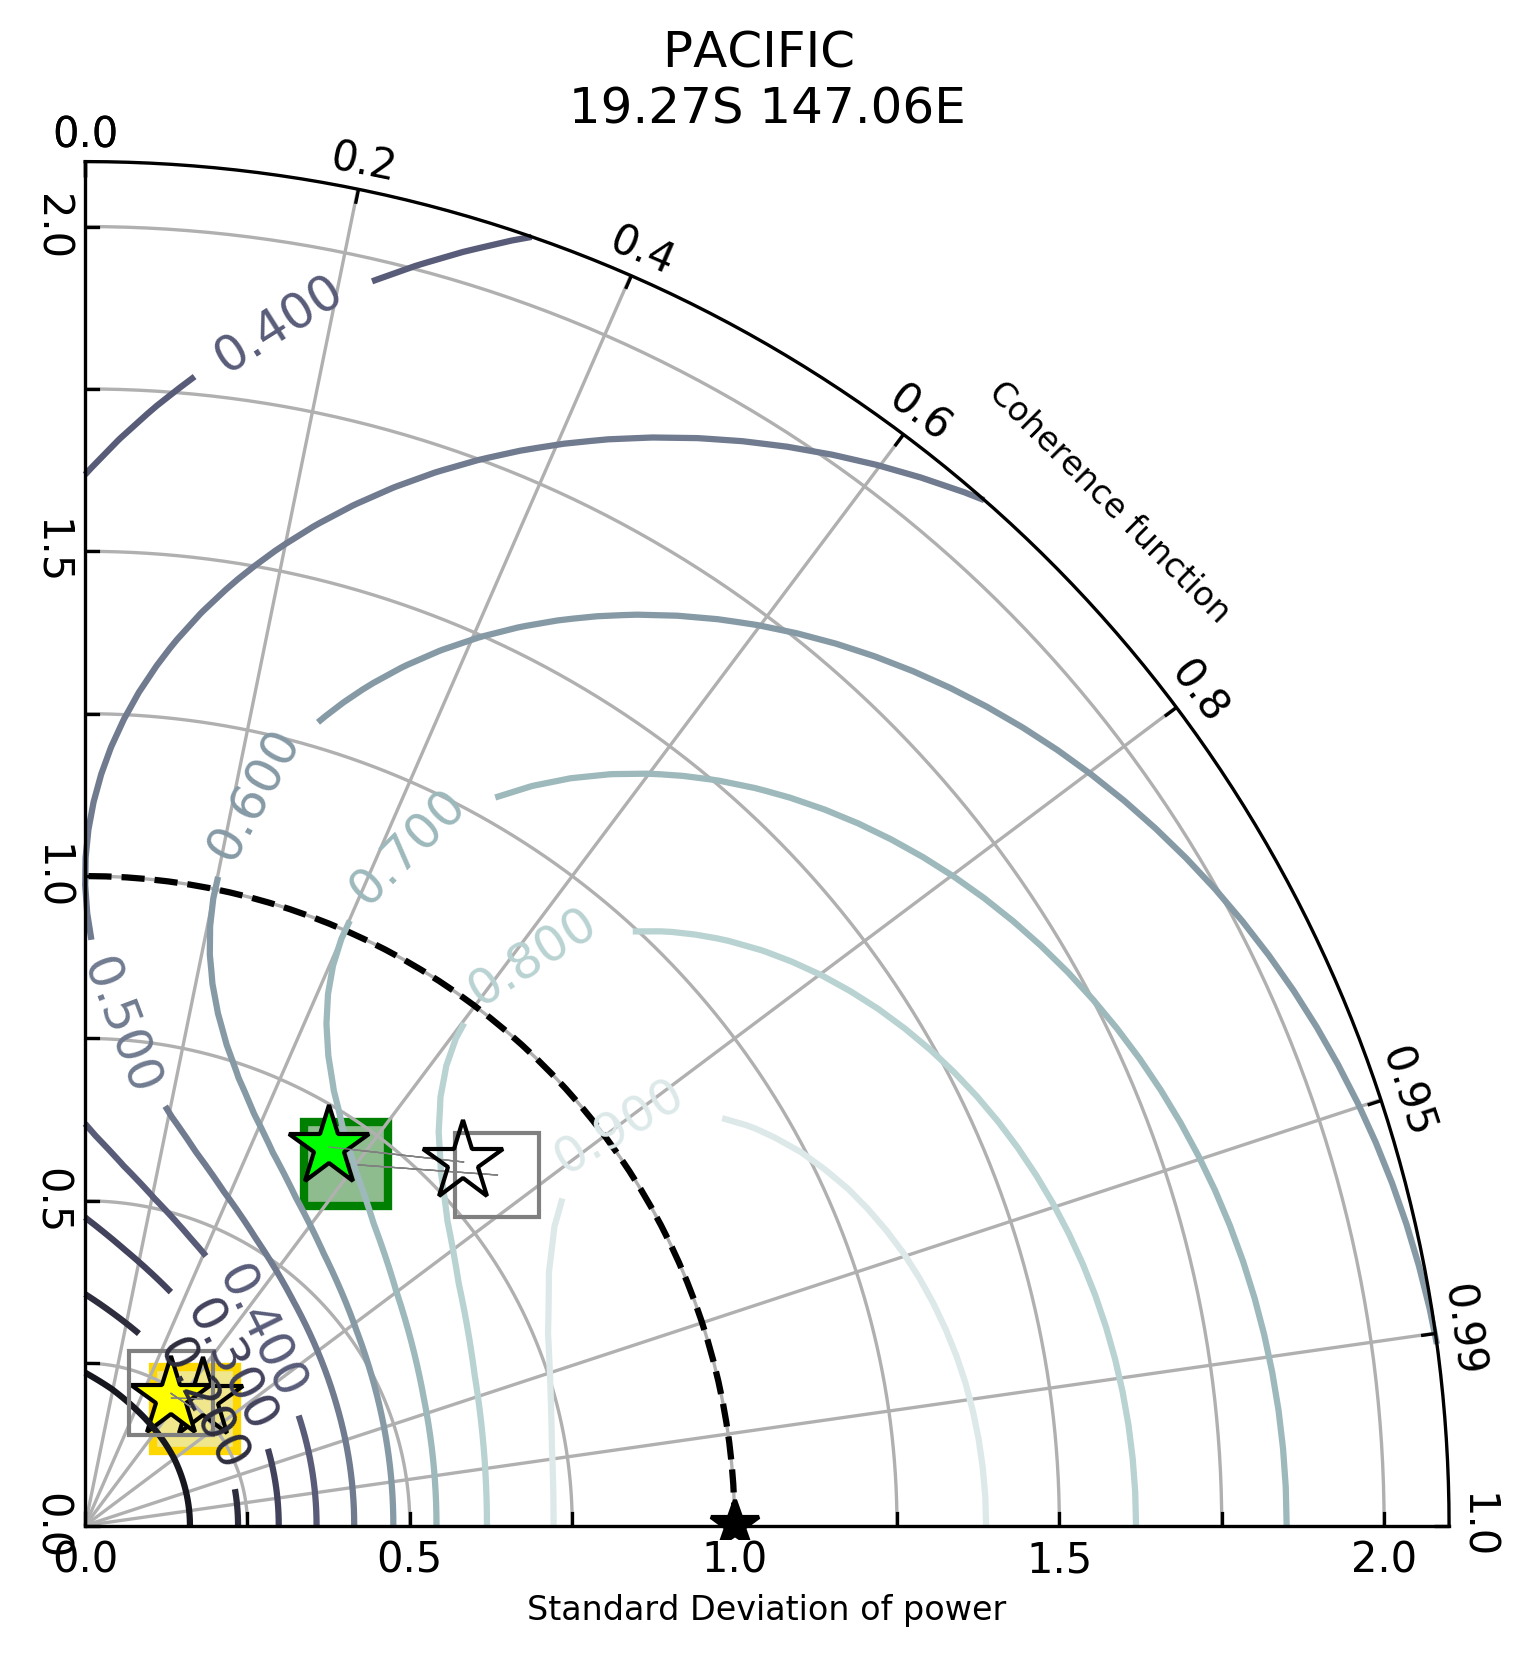

In [111]:
TaylorSpectral_all(series,series_names, 'AU03','PACIFIC \n 19.27S 147.06E ' )

1.0
--diurnal --
dft 10y 
 coer: 0.61  STD: 1.13  SKILL: 0.79   
dft 20y 
 coer: 0.69   STD: 1.22  SKILL: 0.81  
T8 10y 
 coer: 0.59   STD: 1.22   SKILL: 0.76 
T8 20y 
 coer: 0.72   STD: 1.37  SKILL: 0.78  
--semi --
dft 10y 
 coer: 0.66  STD: 0.21  SKILL: 0.13   
dft 20y 
 coer: 0.73  STD: 0.18  SKILL: 0.11   
T8 10y 
 coer: 0.74  STD: 0.20  SKILL: 0.13   
T8 20y 
 coer: 0.73  STD: 0.19  SKILL: 0.12   
saving figure in figs


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in arccos
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:147: RuntimeWarning: divide by zero encountered in true_divide


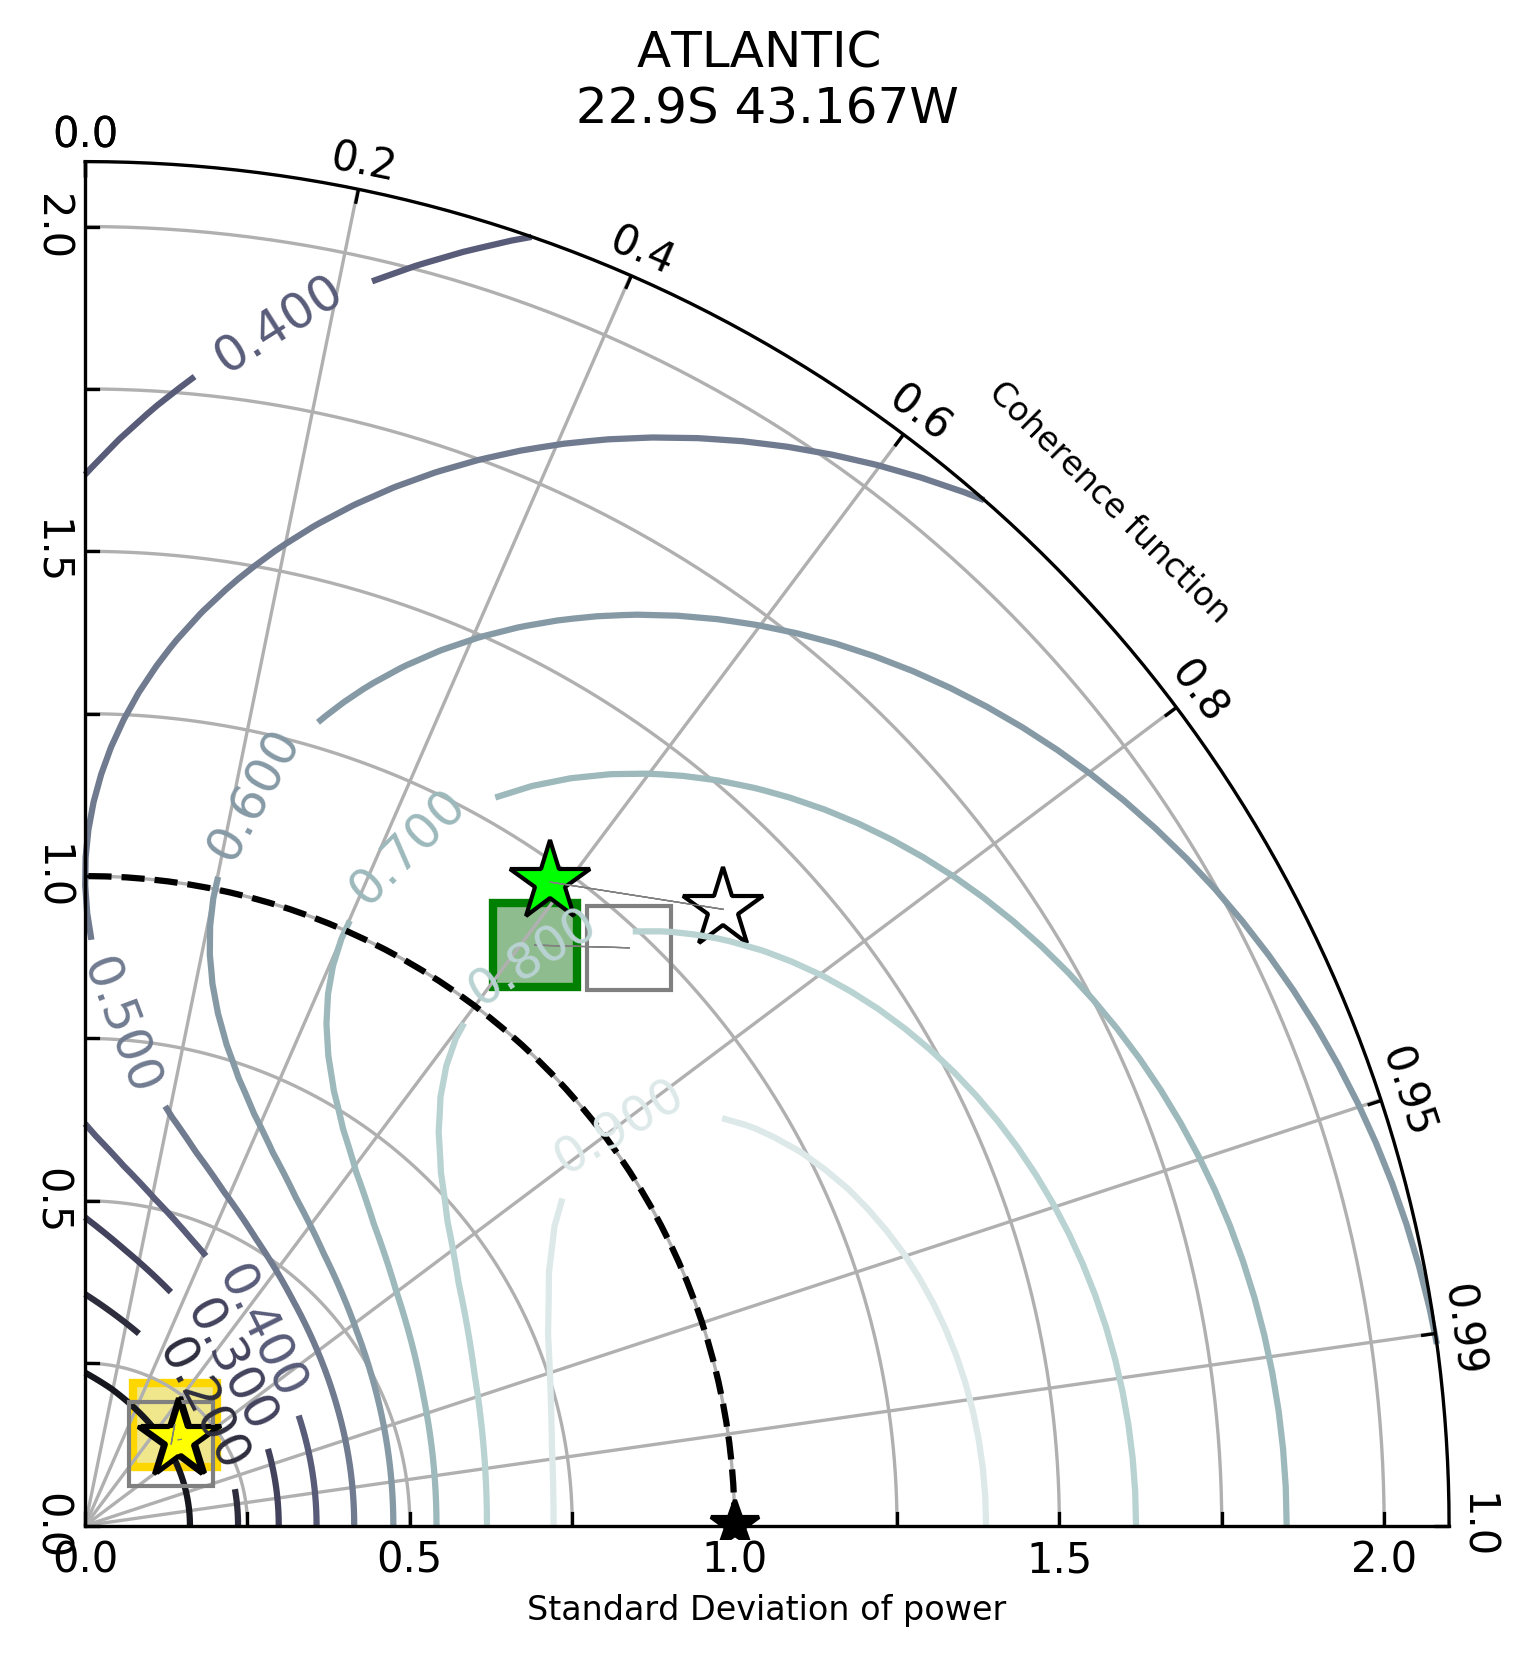

In [109]:

TaylorSpectral_all(series,series_names, 'BR01','ATLANTIC \n 22.9S 43.167W ')


1.0
--diurnal --
dft 10y 
 coer: 0.65  STD: 0.65  SKILL: 0.69   
dft 20y 
 coer: 0.64   STD: 0.63  SKILL: 0.66  
T8 10y 
 coer: 0.63   STD: 0.68   SKILL: 0.70 
T8 20y 
 coer: 0.69   STD: 0.66  SKILL: 0.71  
--semi --
dft 10y 
 coer: 0.56  STD: 0.17  SKILL: 0.09   
dft 20y 
 coer: 0.58  STD: 0.16  SKILL: 0.08   
T8 10y 
 coer: 0.62  STD: 0.17  SKILL: 0.08   
T8 20y 
 coer: 0.79  STD: 0.18  SKILL: 0.11   
saving figure in figs


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in arccos
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:147: RuntimeWarning: divide by zero encountered in true_divide


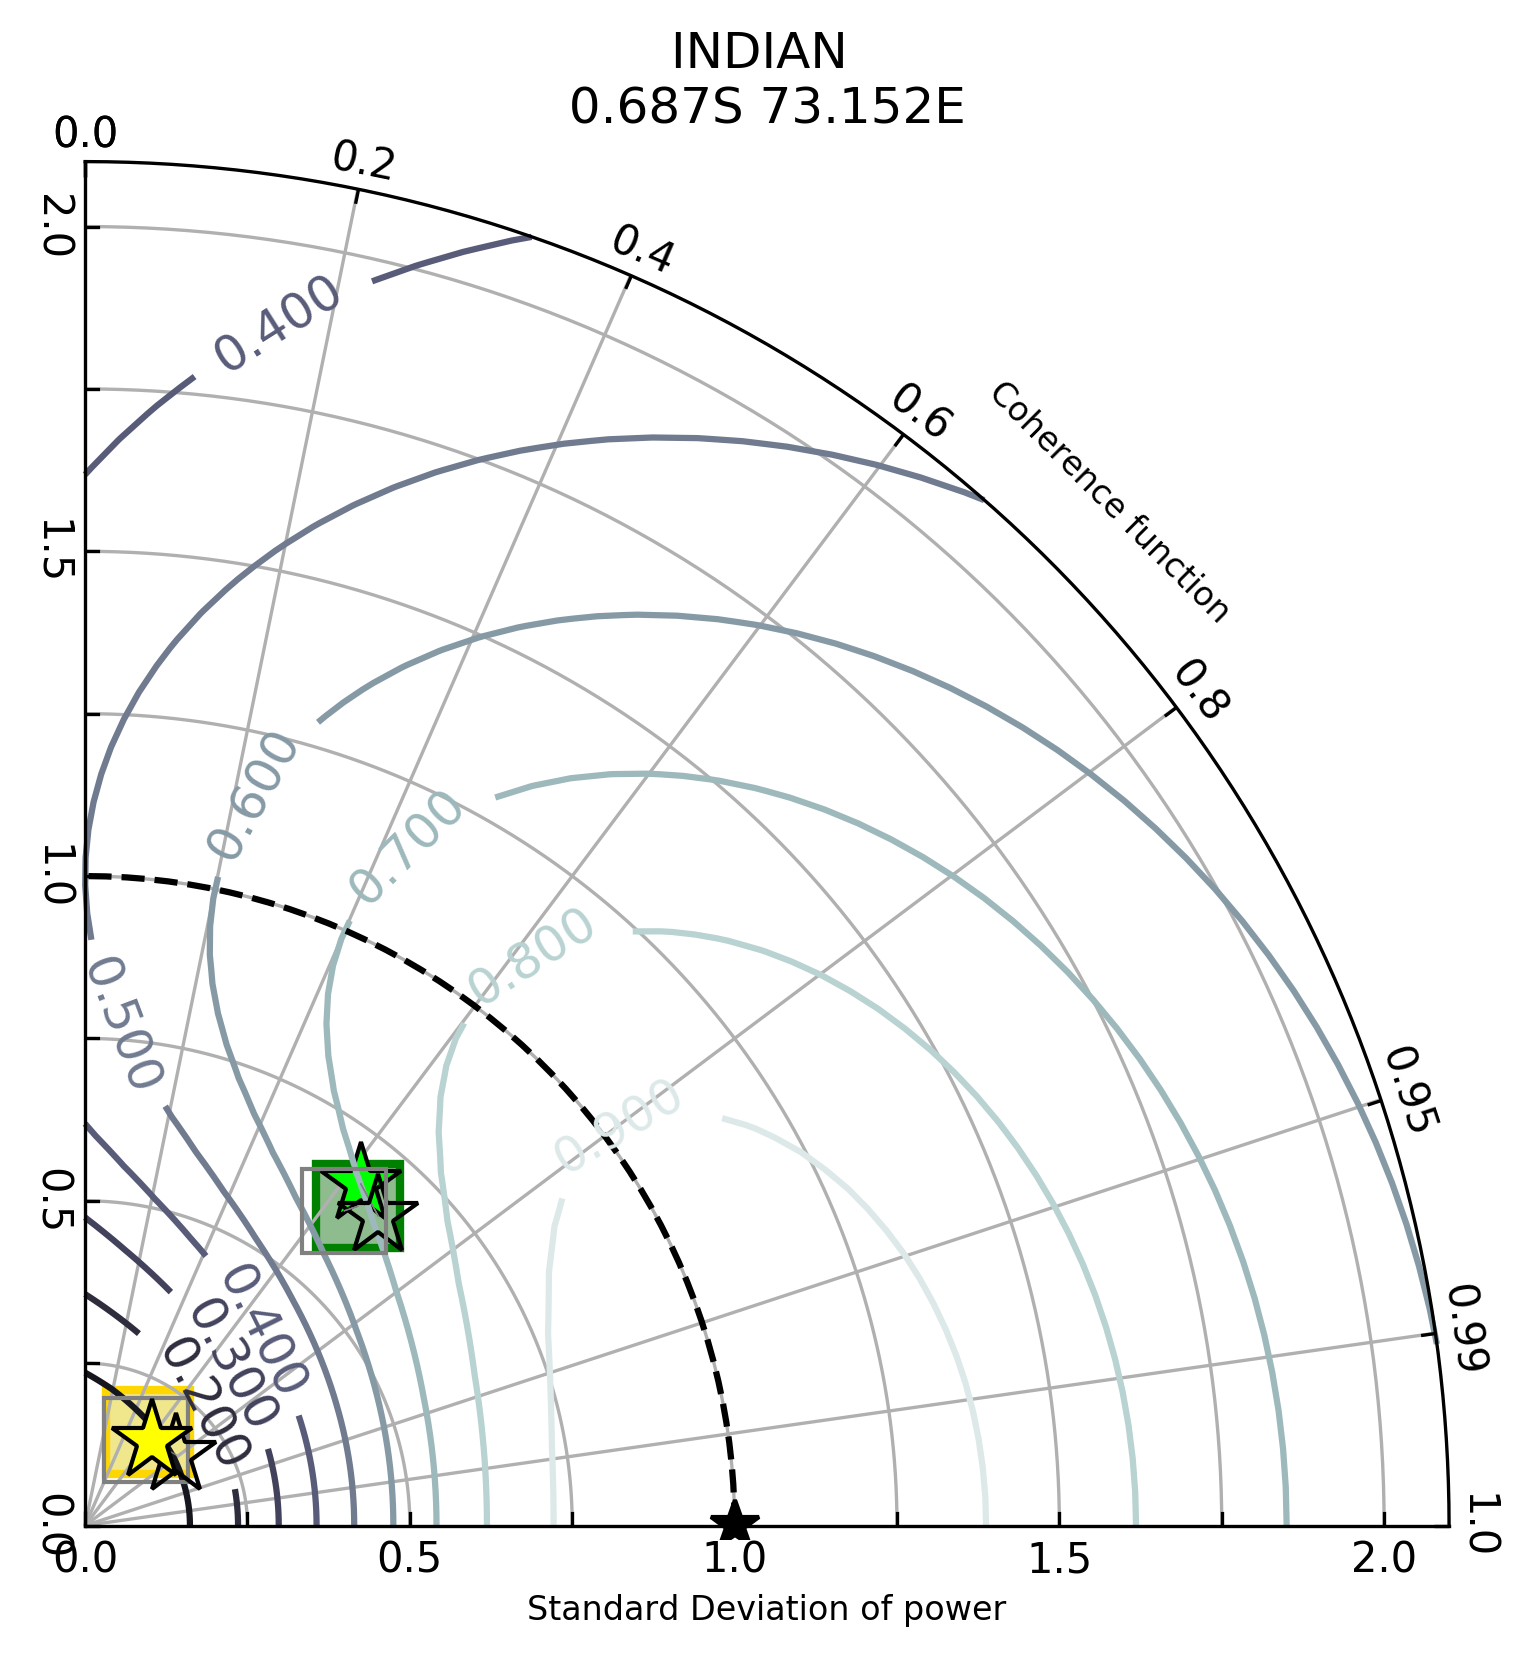

In [107]:
TaylorSpectral_all(series,series_names, 'IND01','INDIAN \n 0.687S 73.152E ' )

In [103]:
!pwd


/Users/Mabel/work/STD_agora_vai


In [112]:
figa=plt.imread('//Users/Mabel/work/STD_agora_vai/figs/fig4_BR01.png')
figb=plt.imread('/Users/Mabel/work/STD_agora_vai/figs/fig4_IND01.png')
figc=plt.imread('/Users/Mabel/work/STD_agora_vai/figs/fig4_AU03.png')




# Stitch the two figures together
fig1=np.concatenate((figa,figb,figc),axis=1)

plt.imsave('/Users/Mabel/work/STD_agora_vai/figs/fig4.png',fig1,cmap=None)

# BASINS

In [69]:
series,obs = {}, {}
series[0] = T880_BR01[:]
series[1] = T880_IND01[:]
series[2] = T880_AU03[:]

obs[0] = g80_BR01[:]
obs[1] = g80_IND01[:]
obs[2] = g80_AU03[:]


In [4]:

path_gloss = '/Volumes/HD_Mabel/GMD/MODEL_SAMPLES/GLOSS/seasonal/'
path_T8 = '/Volumes/HD_Mabel/GMD/MODEL_SAMPLES/T8/DJF/'

tg = 'AU03'#'BR01'#'AU03'
print (tg)
with open( path_gloss+"%s_1979_12.p"%tg, "rb" ) as fd:
    g1 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open( path_gloss+"%s_1980_01.p"%tg, "rb" ) as fd:
    g2 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open( path_gloss+"%s_1980_02.p"%tg, "rb" ) as fd:
    g3 = pickle.load(fd, fix_imports=True, encoding="latin1")
gloss80_AU03 = np.concatenate((g1,g2,g3),axis=0)



with open(path_T8+"T8_%s_1979_12.p"%tg, "rb" ) as fd:
    g1 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open( path_T8+"T8_%s_1980_01.p"%tg, "rb") as fd:
    g2 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open( path_T8+"T8_%s_1980_02.p"%tg, "rb" ) as fd:
    g3 = pickle.load(fd, fix_imports=True, encoding="latin1")
T8_80_AU03 = np.concatenate((g1,g2,g3),axis=0)


tg = 'BR01'#'AU03'
print (tg)
with open( path_gloss+"%s_1979_12.p"%tg, "rb" ) as fd:
    g1 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open( path_gloss+"%s_1980_01.p"%tg, "rb" ) as fd:
    g2 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open( path_gloss+"%s_1980_02.p"%tg, "rb" ) as fd:
    g3 = pickle.load(fd, fix_imports=True, encoding="latin1")
gloss80_BR01 = np.concatenate((g1,g2,g3),axis=0)



with open(path_T8+"T8_%s_1979_12.p"%tg, "rb" ) as fd:
    g1 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open( path_T8+"T8_%s_1980_01.p"%tg, "rb") as fd:
    g2 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open( path_T8+"T8_%s_1980_02.p"%tg, "rb" ) as fd:
    g3 = pickle.load(fd, fix_imports=True, encoding="latin1")
T8_80_BR01 = np.concatenate((g1,g2,g3),axis=0)


tg = 'IND01'#'BR01'#'AU03'
print (tg)
with open( path_gloss+"%s_1979_12.p"%tg, "rb" ) as fd:
    g1 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open( path_gloss+"%s_1980_01.p"%tg, "rb" ) as fd:
    g2 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open( path_gloss+"%s_1980_02.p"%tg, "rb" ) as fd:
    g3 = pickle.load(fd, fix_imports=True, encoding="latin1")
gloss80_IND01 = np.concatenate((g1,g2,g3),axis=0)



with open(path_T8+"T8_%s_1979_12.p"%tg, "rb" ) as fd:
    g1 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open( path_T8+"T8_%s_1980_01.p"%tg, "rb") as fd:
    g2 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open( path_T8+"T8_%s_1980_02.p"%tg, "rb" ) as fd:
    g3 = pickle.load(fd, fix_imports=True, encoding="latin1")
T8_80_IND01 = np.concatenate((g1,g2,g3),axis=0)


series,obs = {},{}

#dt_70 = len(dft_70[:])-len(gloss70[:])
dt_80 = len(T8_80_BR01[:])-len(gloss80_BR01[:])



series[0] = T8_80_BR01[:]
series[1] = T8_80_IND01[:]
series[2] = T8_80_AU03[:]

obs[0] = gloss80_BR01[:][0:dt_80]
obs[1] = gloss80_IND01[:][0:dt_80]
obs[2] = gloss80_AU03[:][0:dt_80]

print (len(series[1]),len(obs[1]))


AU03
BR01
IND01
2160 2160


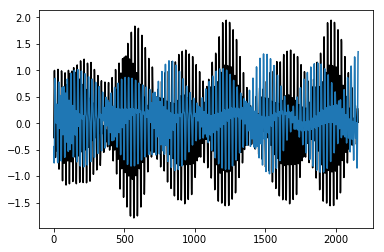

In [94]:
plot(obs[2], 'k')
plot(series[2])


In [10]:
def STD_BASIN(obs,series,series_names): #,s_name,series_names,fig_name,text_name):
    """ Taylor Diagram : obs is reference data sample
        in a full diagram (0 --> npi)
        --------------------------------------------------------------------------
        Input: f - freq of reference  -- > lead to a phase reference
               series - dictionary with time series to test.
                        series[0] = reference time series by default
               s_name - list of the names of the time series
               fig_name   - if name!= 'default' save the figure in /Users/usuario/CSIRO/figs/
    """
    import numpy as np
    from numpy import ma
    import mpl_toolkits.axisartist.grid_finder as GF
    import mpl_toolkits.axisartist.floating_axes as FA
    import matplotlib.pyplot as plt
    import statistics
    
    #f_ref = np.abs(f - series[0]['period'][:]).argmin() 
    coerdata =0
    coer =0
    std=0
    coer_l,coer_s,coer_d = 0,0,0
    std_l,std_s,std_d,std0 =0,0,0,0

       
    coerdata,coer,std,std_max ={},{},{},{}
    coer_l,coer_s,coer_d,coer_M2 = {},{},{},{}
    std_l,std_s,std_d,std0,std_M2 ={},{},{},{},{}
    std_s0,std_d0,std_l0,std0_M2={},{},{},{}
 
    
    for i in series.keys():
        series[i]   = hstack(series[i])                    # stack array in sequence horizontally- fft in axis =0
        coerdata[i] = coherence(series[i],obs[i])
        #coerdata2[i] = coherence(series[i],series[5])
        n           = len(coerdata[i]['sxx'])
    
        
        #f_ref       = np.abs(coerdata[0]['f'][:] - fmin).argmin()
        #f_rmax      = np.abs(coerdata[0]['f'][:] - fmax).argmin()
        
        fl_ref       = np.abs(coerdata[0]['f'][:] - 0.0).argmin()
        fl_rmax      = np.abs(coerdata[0]['f'][:] - 0.004).argmin()
        fd_ref       = np.abs(coerdata[0]['f'][:] - 0.036).argmin()
        fd_rmax      = np.abs(coerdata[0]['f'][:] - 0.042).argmin()
        fs_ref       = np.abs(coerdata[0]['f'][:] - 0.077).argmin()
        fs_rmax      = np.abs(coerdata[0]['f'][:] - 0.084).argmin()
        f_M2         = np.abs(coerdata[0]['f'][:] - 0.082367).argmin()
        
        
        std[i]      = np.sqrt(1.0/n * pow((coerdata[i]['sxx'] -np.mean(coerdata[i]['sxx'])),2))
     
        #std[i]      = std[i][f_ref]
        
        
        #std_max[i]  = np.sqrt(1.0/(len(coerdata[i]['sxx'])) *  (pow((coerdata[i]['sxx'][f_rmax] -np.mean(coerdata[i]['sxx'])),2)))
        coer[i]     = coerdata[i]['coer'][fd_ref]
        
        
        std[i]      = np.sqrt(1.0/n * pow((coerdata[i]['sxx'] -np.mean(coerdata[i]['sxx'])),2))
        std0[i]      = np.sqrt(1.0/n * pow((coerdata[i]['syy'] -np.mean(coerdata[i]['syy'])),2))
     
        coer_d[i] = np.mean(abs(coerdata[i]['coer'][fd_rmax:fd_ref]))
        std_d[i] = np.sqrt(1.0/n * sum(pow((coerdata[i]['sxx'][fd_rmax:fd_ref] -np.mean(coerdata[i]['sxx'])),2)))
        std_d0[i] = np.sqrt(1.0/n * sum(pow((coerdata[i]['syy'][fd_rmax:fd_ref] -np.mean(coerdata[i]['syy'])),2)))
        
        coer_s[i] = np.mean(abs(coerdata[i]['coer'][fs_rmax:fs_ref]))
        std_s[i] = np.sqrt(1.0/n * sum(pow((coerdata[i]['sxx'][fs_rmax:fs_ref] -np.mean(coerdata[i]['sxx'])),2)))
        std_s0[i] = np.sqrt(1.0/n * sum(pow((coerdata[i]['syy'][fs_rmax:fs_ref] -np.mean(coerdata[i]['syy'])),2)))
        
        coer_l[i] = np.mean(abs(coerdata[i]['coer'][fl_rmax:fl_ref]))
        std_l[i] = np.sqrt(1.0/n * sum(pow((coerdata[i]['sxx'][fl_rmax:fl_ref] -np.mean(coerdata[i]['sxx'])),2)))
        std_l0[i] = np.sqrt(1.0/n * sum(pow((coerdata[i]['syy'][fl_rmax:fl_ref] -np.mean(coerdata[i]['syy'])),2)))        
            
        coer_M2[i] = np.mean(abs(coerdata[i]['coer'][f_M2]))
        std_M2[i] = np.sqrt(1.0/n * sum(pow((coerdata[i]['sxx'][f_M2] -np.mean(coerdata[i]['sxx'])),2)))
        std0_M2[i] = np.sqrt(1.0/n * sum(pow((coerdata[i]['syy'][f_M2] -np.mean(coerdata[i]['syy'])),2)))         
        
        
        
        #if coer[i]<0 :
        #    coer[i] = -coer[i]
        
        #print s_name[i], coer[i], std[i]/std[0]
        
        
    ref = 1 #np.abs(coerdata[0]['sxx'][f_ref].real-np.mean(coerdata[0]['sxx'].real)) # std[0]#1
    #mean values to be R0
    numbers = [coer[key] for key in coer]
    MED = statistics.mean(numbers)
    MAX = np.max(numbers)
    print (MAX)
    
    rlocs = around(np.concatenate((np.arange(0,-10,-0.2),[-0.95,-0.99],np.arange(0,10,0.2),[0.95,0.99])),2)
    str_rlocs = np.concatenate((np.arange(0,10,0.2),[0.95,0.99],np.arange(0,10,0.2),[0.95,0.99]))
    tlocs = np.arccos(rlocs)        # Conversion to polar angles
    gl1 = GF.FixedLocator(tlocs)    # Positions
    tf1 = GF.DictFormatter(dict(zip(tlocs, map(str,rlocs))))
    

    str_locs2 = np.arange(-10,11,0.5)
    tlocs2 =  np.arange(-10,11,0.5)      # Conversion to polar angles
       
    g22 = GF.FixedLocator(tlocs2)  
    tf2 = GF.DictFormatter(dict(zip(tlocs2, map(str,str_locs2))))

    
    
    
    tr = PolarAxes.PolarTransform()
    
    smin = 0
    smax = 2.1

    ghelper = FA.GridHelperCurveLinear(tr,
                                           extremes=(0,np.pi/2, # 1st quadrant
                                                     smin,smax),
                                           grid_locator1=gl1,
                                           #grid_locator2=g11,
                                           
                                           tick_formatter1=tf1,
                                           tick_formatter2=tf2,
                                           )
    
    
    fig = plt.figure(figsize=(10,5.5), dpi=300)
    #fig.text(.5, .95, '%s'%text_name, horizontalalignment='center',fontsize=25)

    ax = FA.FloatingSubplot(fig,111, grid_helper=ghelper)
    #ax.set_title('%s'%text_name, horizontalalignment='center',fontsize=12)

    fig.add_subplot(ax)
    ax.axis["top"].set_axis_direction("bottom") 
    ax.axis["top"].toggle(ticklabels=True, label=True)
    ax.axis["top"].major_ticklabels.set_axis_direction("top")
    ax.axis["top"].label.set_axis_direction("top")
    ax.axis["top"].label.set_text("Coherence function")
    ax.axis["top"].label.set_fontsize(8)
    
    ax.axis["left"].set_axis_direction("bottom") 
    ax.axis["left"].label.set_text("Standard Deviation of power")
    ax.axis["left"].label.set_fontsize(8)
    
    ax.axis["right"].set_axis_direction("top") 
    ax.axis["right"].toggle(ticklabels=True, label=True)
    ax.axis["right"].set_visible(True)
    ax.axis["right"].major_ticklabels.set_axis_direction("bottom")
   

    ax.axis["bottom"].set_visible(False) 

    ax.grid(True)

    ax = ax.get_aux_axes(tr)

    t = np.linspace(0, np.pi/2)
    r = np.zeros_like(t) + ref
    ax.plot(t,r, 'k--', label='_')


    rs,ts = np.meshgrid(np.linspace(smin,smax),
                            np.linspace(0,np.pi/2))

    
    #rms = np.sqrt(ref**2 + rs**2 - 2*ref*rs*np.cos(ts))
    #rms = 1 *e**(-(ref-ts)*np.pi/180)
    rms = (4*(1+np.cos(ts))/((rs+1/rs)**2 *(1+MAX)))#/std[0]
    CS =ax.contour(ts, rs,rms,[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],cmap = cm.bone)
    plt.clabel(CS, inline=1, fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)

    ax.plot(np.arccos(0.999999),ref,'k',marker='*',ls='', ms=12)
    aux = range(1,len(series.keys()))
    #del aux[ref]
    
        # PLOT
    #print '--semi and diurnal --'
    xd = ma.masked_all(len(series.keys()))
    yd = ma.masked_all(len(series.keys()))
    xs = ma.masked_all(len(series.keys()))
    ys = ma.masked_all(len(series.keys()))
    xl = ma.masked_all(len(series.keys()))
    yl = ma.masked_all(len(series.keys()))    
    
    #m= ['o', 'v', '<','>','D','*','s','p','h','x']
    mf  = [20,20,20,20]*100
    alp = ['1','1','1','1']*100
    #ax2 = z
    for i in  series.keys():
        std_d1,std_s1,std_l1,std_M21 ={},{},{},{}
        print (i)
        # -- diurnal --
        std_d1[i]=std_d[i]/std_d0[i]
        ax.plot(np.arccos(coer_d[i]),std_d1[i],marker='o',ms=mf[i],markerfacecolor="darkseagreen")
        #rmse_d = np.sqrt(1**2 + (std_d [i]/std_d [0])**2 - 2*1*(std_d [i]/std_d [0])*coer_d [i])
        ax.text(np.arccos(coer_d[i]),std_d1[i], '%s'%series_names[i], color="k", fontsize=18)
        skill = (4*(1+(coer_d[i]))/((std_d1[i]+1/std_d1[i])**2 *(1+MAX)))
        print (' -- diurnal --')
        print (' coer: %.2f  STD: %.2f  SKILL: %.2f   '%(coer_d[i],std_d1[i],skill))
        # -- semidiurnal --
        std_s1[i]=std_s[i]/std_s0[i]
        ax.plot(np.arccos(coer_s[i]),std_s1[i],marker='o',ms=mf[i], markerfacecolor="khaki")        #rmse_d = np.sqrt(1**2 + (std_d [i]/std_d [0])**2 - 2*1*(std_d [i]/std_d [0])*coer_d [i])
        ax.text(np.arccos(coer_s[i]),std_s1[i], '%s'%series_names[i], color="k", fontsize=18)
        skill = (4*(1+(coer_s[i]))/((std_s1[i]+1/std_s1[i])**2 *(1+MAX)))
        print ('-- semidiurnal --')
        print (' coer: %.2f  STD: %.2f  SKILL: %.2f   '%(coer_s[i],std_s1[i],skill))
        # -- long term ---
        #std_l1[i]=std_l[i]/std_l0[i]
        #ax.plot(np.arccos(coer_l[i]),std_l1[i],marker='o',ms=mf[i],alpha=alp[i],label='L %s'%s_name[i], markerfacecolor="orchid", markeredgewidth=1, zorder=1)
        ##rmse_d = np.sqrt(1**2 + (std_d [i]/std_d [0])**2 - 2*1*(std_d [i]/std_d [0])*coer_d [i])
        #ax.text(np.arccos(coer_l[i]),std_l1[i], '%s'%series_names[i], color="k", fontsize=18)
        #skill = (4*(1+(coer_l[i]))/((std_l1[i]+1/std_l1[i])**2 *(1+MAX)))
        #print (' coer: %.2f  STD: %.2f  SKILL: %.2f   '%(coer_l[i],std_l1[i],skill))
        # -- M2 ---
        std_M21[i]=std_M2[i]/std0_M2[i]
        ax.plot(np.arccos(coer_M2[i]),std_M21[i],marker='o',ms=mf[i], markerfacecolor="orchid", markeredgewidth=1, zorder=1)        #rmse_d = np.sqrt(1**2 + (std_d [i]/std_d [0])**2 - 2*1*(std_d [i]/std_d [0])*coer_d [i])
        ax.text(np.arccos(coer_M2[i]),std_M21[i], '%s'%series_names[i], color="k", fontsize=18)
        #skill = (4*(1+(coer_M2[i]))/((std_M21[i]+1/std_M21[i])**2 *(1+MAX)))
        print ('M2')
        print (' coer: %.2f  STD: %.2f  SKILL: %.2f   '%(coer_M2[i],std_M21[i],skill))
        
        
        name=['diurnal','semidiurnal','M2','0. Ilha Fiscal','1.Gan','2.Townsville']
        #p1 = Rectangle((0, 0), 1, 1, fc="orchid",alpha=0.5)
        p2 = Rectangle((0, 0), 1, 1, fc="green",alpha=0.5)
        p3 = Rectangle((0, 0), 1, 1, fc="gold",alpha=0.5)
        p31 = Rectangle((0, 0), 1, 1, fc="orchid",alpha=0.5)
        #p4 = plt.Line2D((0,1),(0,0), color='k',ms=20, fillstyle = 'right', markerfacecolor="grey",markeredgecolor="black", markeredgewidth=0.5)
        p5 = plt.Line2D((0,1),(0,0), color='k',ms=20, fillstyle = 'right', markerfacecolor="grey",markeredgecolor="black", markeredgewidth=0.5)
        p6 = plt.Line2D((0,1),(0,0), color='k',ms=20, fillstyle = 'right', markerfacecolor="grey",markeredgecolor="black", markeredgewidth=0.5)
        p7 = plt.Line2D((0,1),(0,0), color='k',ms=20, fillstyle = 'right', markerfacecolor="grey",markeredgecolor="black", markeredgewidth=0.5)
    
        legend((p2,p3,p31,p5,p6,p7), name,bbox_to_anchor = (0.5,-0.1),prop=dict(size='large'),loc=9,ncol=2)       
       
            
        #legend(bbox_to_anchor=(1.1, 1.),prop=dict(size='small'),loc='best',ncol=2)
        #p1 = Rectangle((0, 0), 1, 1, fc="gold",alpha=0.5)
        #p2 = Rectangle((0, 0), 1, 1, fc="green",alpha=0.5)
        #p3 = plt.Line2D((0,1),(0,0), color='k', marker='s',ms=20, fillstyle = 'left', markerfacecolor="grey",markeredgecolor="black", markeredgewidth=0.5)
        #p4 = plt.Line2D((0,1),(0,0), color='k', marker='*',ms=20, fillstyle = 'left', markerfacecolor="grey",markeredgecolor="black", markeredgewidth=0.5)

        #legend((p1,p2, p3,p4), ('semidiurnal','diurnal','10y-20y  DFT','10y-20y  T8'),bbox_to_anchor=(1.1, 1.1),prop=dict(size='x-large'),loc='best',ncol=1 )
        
        # --- location
        #ax=subplot(4,2,4)
        ##m = Basemap(projection='cyl',llcrnrlat=-25,urcrnrlat=-15,llcrnrlon=120,urcrnrlon=130,resolution='c')
        #m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-280,urcrnrlon=80,resolution='c')
        #m.drawmapboundary()
        #m.drawcoastlines()
        #m.drawstates()
        #m.fillcontinents()
        #x,y = m(struct['lon'][ind],struct['lat'][ind])
        #x,y = m(122.219,-18.001 )
        #m.scatter(x,y,100, marker='o')
        
        # --- power spectrum  --
        #cl = ['black','blue', 'b:', 'red','r:']
        
        #line = [0.5,2,2,2,2,2]
        #alfa = [0.5,1,1,1,1,1]
        #ax = plt.subplot(3,2,4)
        ##ax = plt.subplot(4,2,6)
        #for i in [1,2,3,4]:  
        #    if i ==2 or i ==4:
        #        ax.plot(coerdata2[0]['f'][:],coerdata2[i]['sxx'][:], cl[i],alpha=alfa[i],label='%s'%s_name[i], linewidth =line[i] )
        #    else:
        #        ax.plot(coerdata[0]['f'][:],coerdata[i]['sxx'][:], cl[i],alpha=alfa[i],label='%s'%s_name[i], linewidth =line[i] )
        #    #ax.plot(coerdata[0]['f'][f_ref],coerdata[i]['sxx'][f_ref],cl[i],marker='8',ms=10,alpha=0.4)
        #    ylim(0.0000001,100000000)
        #    xlim(0,0.5)
        #    #xlim(coerdata[0]['f'][f_ref]-0.1,coerdata[0]['f'][f_ref]+0.1)
        #    ax.axvspan(0.077, 0.084, facecolor='khaki', alpha=0.3)
        #    ax.axvspan(0.036, 0.042, facecolor='lightgreen', alpha=0.3)
        #    ax.tick_params(axis='both', which='major', labelsize=12)
        #    ax.set_yscale('log')
        #    xlabel('frequency [cph]',fontsize=12)
        #    ylabel('Power [meters x meters]',fontsize=12)
        #    ax.set_title('Power Spectrum',fontsize=15)
        #legend(bbox_to_anchor=(1, 1),prop=dict(size='medium'),loc='best')    
        
        
        
        #plt.tight_layout()

        #if (fig_name!= 'default'):
        #    print ('saving figure in figs')
        #    plt.savefig('figs/fig4_%s.png'%fig_name,bbox_inches='tight')
        
        
    #print coerdata[0]['f'][f_ref],coerdata[0]['f'][f_rmax]
    #plt.tight_layout()
    plt.savefig('figs/model_harm.png',bbox_inches='tight')
    pylab.show()
    return

['0', '1', '2']
0.9783048342584048
0
 -- diurnal --
 coer: 0.72  STD: 1.37  SKILL: 0.79   
-- semidiurnal --
 coer: 0.73  STD: 0.19  SKILL: 0.12   
M2
 coer: 0.77  STD: 0.04  SKILL: 0.12   
1
 -- diurnal --
 coer: 0.69  STD: 0.66  SKILL: 0.72   
-- semidiurnal --
 coer: 0.79  STD: 0.18  SKILL: 0.11   
M2
 coer: 0.91  STD: 0.04  SKILL: 0.11   
2
 -- diurnal --
 coer: 0.72  STD: 0.81  SKILL: 0.83   
-- semidiurnal --
 coer: 0.68  STD: 0.27  SKILL: 0.21   
M2
 coer: 0.90  STD: 0.11  SKILL: 0.21   


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:96: RuntimeWarning: invalid value encountered in arccos
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:167: RuntimeWarning: divide by zero encountered in true_divide


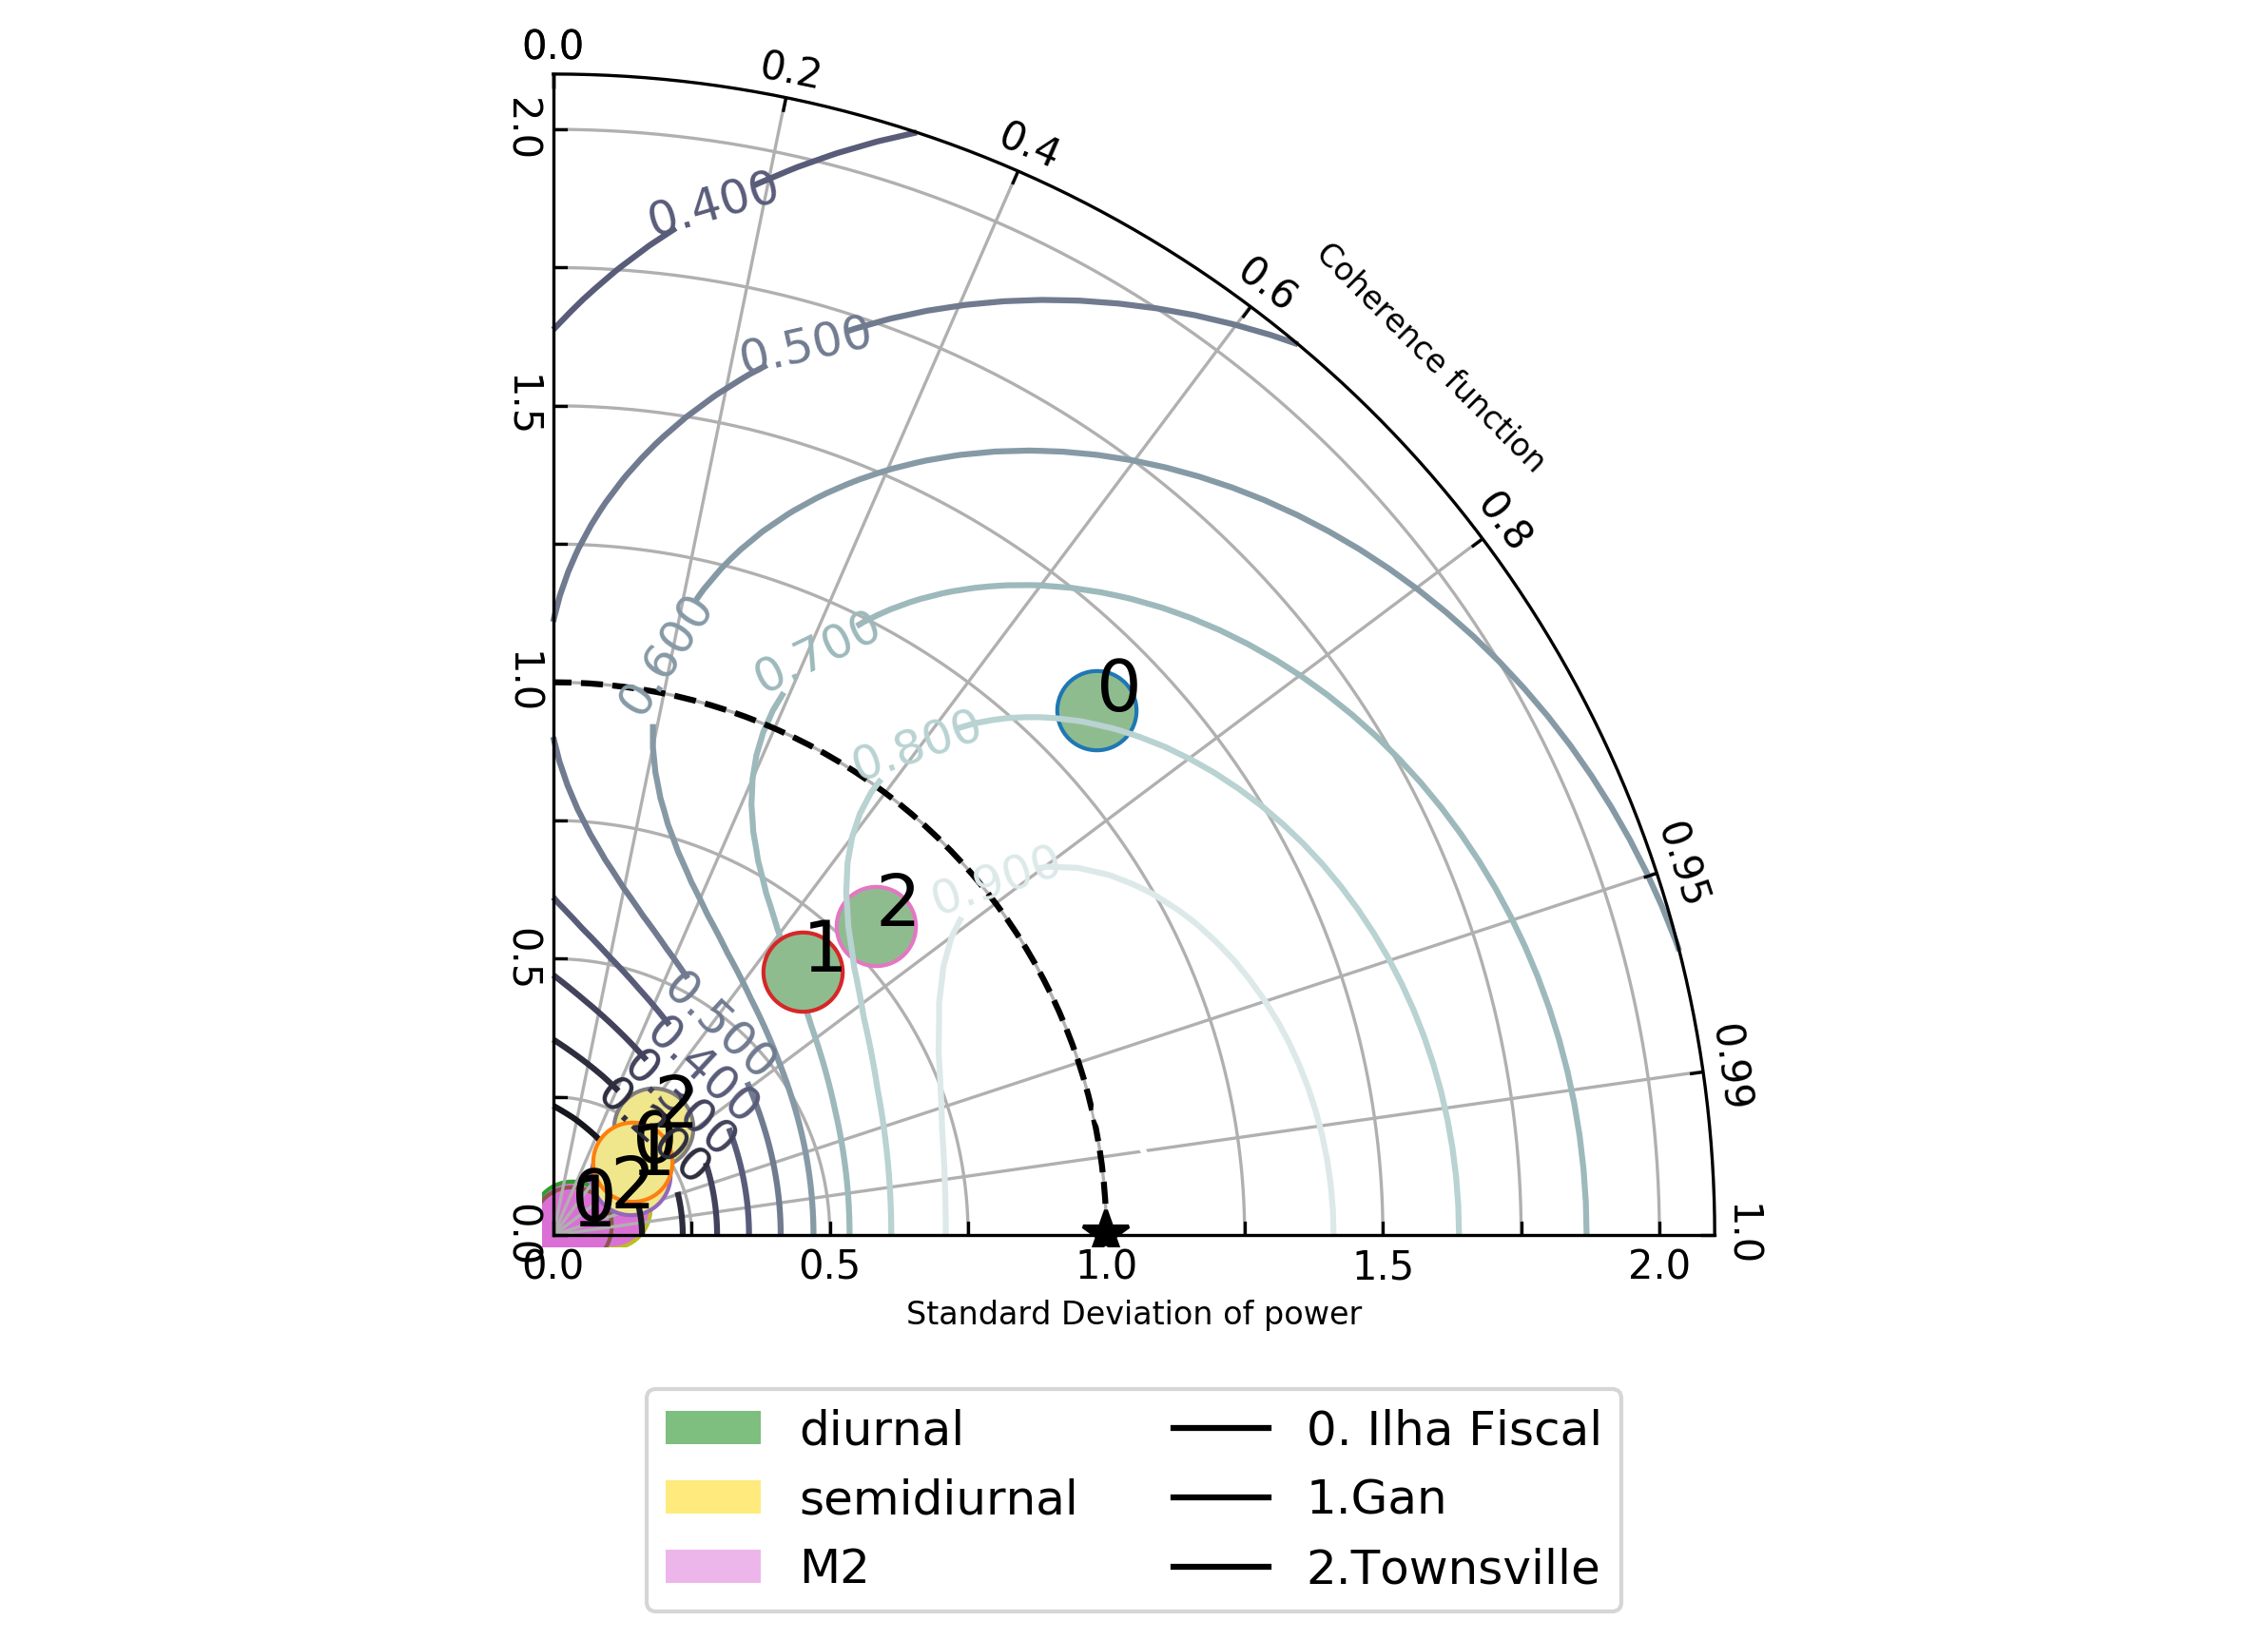

In [11]:
#series_names =[str(i) for i in range(18)]
#name= ['long term','diurnal','semidiurnal','M2','0.Cocos Is.','1.Gan','2.Fremantle','3.Carnarvon','4.Port Hedland','5.Broome',
#       '6.Townsville','7.Burnett Heads','8.Fort Denison','9.Bluff Harbour','10.Kushimoto','11.Hilo','12.Nome AK',
#       '13. Ilha Fiscal','14.Galveston','15.Halifax','16.Palmeira','17.Port Elizabeth']
# --- INDIAN --
#series_names =[str(i) for i in range(6)]
#name_i = ['long term','diurnal','semidiurnal','M2','0.Cocos Is.','1.Gan','2.Fremantle','3.Carnarvon','4.Port Hedland','5.Broome']
# --- PACIFIC --
#series_names =[str(i) for i in range(7)]
#name_p =['long term','diurnal','semidiurnal','M2','0.Townsville','1.Burnett Heads','2.Fort Denison','3.Bluff Harbour',
#         '4.Kushimoto','5.Hilo','6.Nome AK']
# --- ATLANTIC --
#series_names =[str(i) for i in range(5)]
#name =['long term','diurnal','semidiurnal','M2','0. Ilha Fiscal','1.Galveston','2.Halifax','3.Palmeira','4.Port Elizabeth']

series_names = [str(i) for i in range(3)]
names = ['diurnal','semidiurnal','M2','0. Ilha Fiscal','1.Gan','2.Townsville'] 
print (series_names)

#TaylorSpectral_all(obs,series,series_names,name, 'all', 'ATLANTIC')
STD_BASIN(obs,series,series_names )